# Práctica 2 - MLP para funciones lógicas - Lab 2
## Preparación de entorno
#### Instalar las librerías

In [148]:
#%pip install
#%pip install numpy
#%pip install matplotlib
#%pip install pandas

#### Importar librerías de código

In [149]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## MLP SetUp

* **Perceptrón Multicapa** $\rightarrow$ Red neuronal artificial feedfoward (la información fluye en una dirección, desde la capa de entrada hasta la de salida, sin bucles).
  * Al menos **3 capas**: entrada, oculta y salida.
  * Cada neurona en las capas ocultas y de salida recibe **entradas** de todas las neuronas de la capa anterior, calcula una **suma ponderada** más un sesgo (bias) y aplica una **función de activación** no lineal.

* **Capas del MLP**:
  * **Capa de entrada** $\rightarrow$ REpresenta las características de los datos de entrada, con un número de neuronas igual a la dimensión de los datos de entrada.
  * **Capas ocultas** $\rightarrow$ Procesan las entradas mediante sumas ponderadas y funciones de activación, como la $\text{ReLU}$, la $\text{sigmoide}$ o la $\text{tangente hiperbólica}$.
  * **Capa de salida** $\rightarrow$ Produce las predicciones finales, cno el número de neuronas dependiendo del problema a resolver (regresión, clasificación binaria o multiclase).

* **Entrenamiento del MLP**:
  * **Backpropagation** $\rightarrow$ Método supervisado que ajusta los pesos para minizar la función de pérdida. También se pueden usar otros métodos como Adam, que procesa los datos n mini-lotes hasta converger o alcanzar un número fijo de épocas.

* **Capacidad matemática** $\rightarrow$ Los MLP pueden aproximar cualquier función continua, según el teorema de aproximación universal, dado un número suficiente de neuronas en y capas.

Diferencia entre **Perceptrón** y **Perceptrón Multicapa**:

| Aspecto            | Perceptrón                                           | Perceptrón Multicapa                                                            |
| ------------------ | ---------------------------------------------------- | ------------------------------------------------------------------------------- |
| **Capas**          | Una sola capa (entrada y salida).                    | Al menos 3 capas (entrada, oculta y salida).                                    |
 | **Problema tipo** | Linealmente separable (clasificación binaria).       | No linealmente separable, clasificación y regresión complejas.                  |
 | **Entrenamiento** | Regla de aprendizaje simple.                         | Backpropagation y otros métodos más complejos (requiere funciones no lineales). |
 | **Limitaciones**  | No resuelve el XOR (esta limitado a datos lineales). | Puede sobreajustar si no se controla la complejidad del modelo.                 |

* **Proceso de aprendizaje**:
  1. **Inicialización** $\rightarrow$ Primero, inicializamos los pesos $W$ y el sesgo (bias) $b$ de la red de forma aleatoria (normalmente se usan distribuciones como la normal o la uniforme.). Además, preparamos los valores iniciales para Adam como los vectores de momentos $m_0 = 0$ (primer momento, relacionado con la media de los gradientes) y $v_0 = 0$ (segundo momento, relacionado con la varianza de los gradientes). Los hiperparámetros de Adam incluyen:
     1. $\alpha$ $\rightarrow$ Learning rate.
     2. $\beta_1$ $\rightarrow$ Factor de decaimiento para el primer momento.
     3. $\beta_2$ $\rightarrow$ Factor de decaimiento para el segundo momento.
     4. $\epsilon$ $\rightarrow$ Constante para evitar divisiones entre cero.
  
  2. **Presentación del patrón** $\rightarrow$ Seleccionamos un patrón de entrenamiento (una entrada $x$ y su salida deseada $y$). 
  
  3. **Cálculo de la salida** $\rightarrow$ Propagamos hacia adelante la entrada $x$ a través de la red. Para una red con una capa oculta, el proceso es:
     1. **Capa oculta** $\rightarrow$ $h = ReLU (W_1 \cdot x + b_1)$, donde $ReLU$ es la función de activación $f(x) = max(0, x)$. $ReLU$ nos ayuda a mitigar el problema del desvanecimiento del gradiente.
     2. **Capa de salida** $\rightarrow$ $y_{pred} = sigmoide (W_2 \cdot h + b_2)$, donde $sigmoide$ es la función de activación $f(x) = \frac{1}{1 + e^{-x}}$. Esta función es útil para producir salidas en el rango $[0, 1]$.
  
  4. **Cálculo del Error** $\rightarrow$ Usamos la función de pérdida *Mean Squared Error* (MSE) para calcular el error entre la salida que hemos predicho y la salida que esperábamos. La función MSE es:
     $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{pred} - y_{esperada})^2$$

  5. **Variación de los pesos** $\rightarrow$ Con Adam, calculamos los gradientes de la pérdida con respecto a cada parámetro usando backpropagation. Adam actualiza los pesos adaptando el learning rate para cada parámetro basado en los momentos. Los pasos son:
     1. Calculamos el gradiente $g_t$ en el paso $t$.
     2. Actualizamos el primer momento: $m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$.
     3. Actualizamos el segundo momento: $v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$.
     4. Corregismos el bias: $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$ y $\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$.
     5. Actualizamos los parámetros $W$ y $b$: $W_t = W_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$.
  
  6. **Modificación de los pesos$** $\rightarrow$ Aplicamos las actualizaciones que hemos calculado, ajustando $W$ y $b$ según la fórmula de Adam.
  
  7. **Repetir** $\rightarrow$ Repetimos los pasos 2 a 6 para cada patrón de entrenamiento, hasta que la red haya visto todos los patrones del conjunto de entrenamiento.
  
  8. **Verificar la convergencia** $\rightarrow$ Comprobamos si el error (MSE) ha alcanzado un valor aceptable o si el número de épocas ha llegado a un límite. Si no, volvemos al paso 2.

Referencias (código):
* [MultilayerNN.](https://github.com/KDA-lab/NN-Chainer/blob/edac5d4c6d664404117bcaad253f8e003af278e5/multilayerNN.py)


=== Modelo 1 con 2 neuronas, LR=0.01 ===
Parada temprana en época 29/100
Error final: 0.250545

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.520134  |
| 0.0  | 1.0  | 1.0    | 0.534829  |
| 1.0  | 0.0  | 1.0    | 0.504744  |
| 1.0  | 1.0  | 0.0    | 0.519475  |
------------------------------------

=== Modelo 2 con 2 neuronas, LR=0.1 ===
Parada temprana en época 51/100
Error final: 0.125921

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.040479  |
| 0.0  | 1.0  | 1.0    | 0.971631  |
| 1.0  | 0.0  | 1.0    | 0.517583  |
| 1.0  | 1.0  | 0.0    | 0.517583  |
------------------------------------

=== Modelo 3 con 2 neuronas, LR=0.5 ===
Parada temprana en época 25/100
Error final: 0.250243

Resultados del perceptrón multicapa:
--------

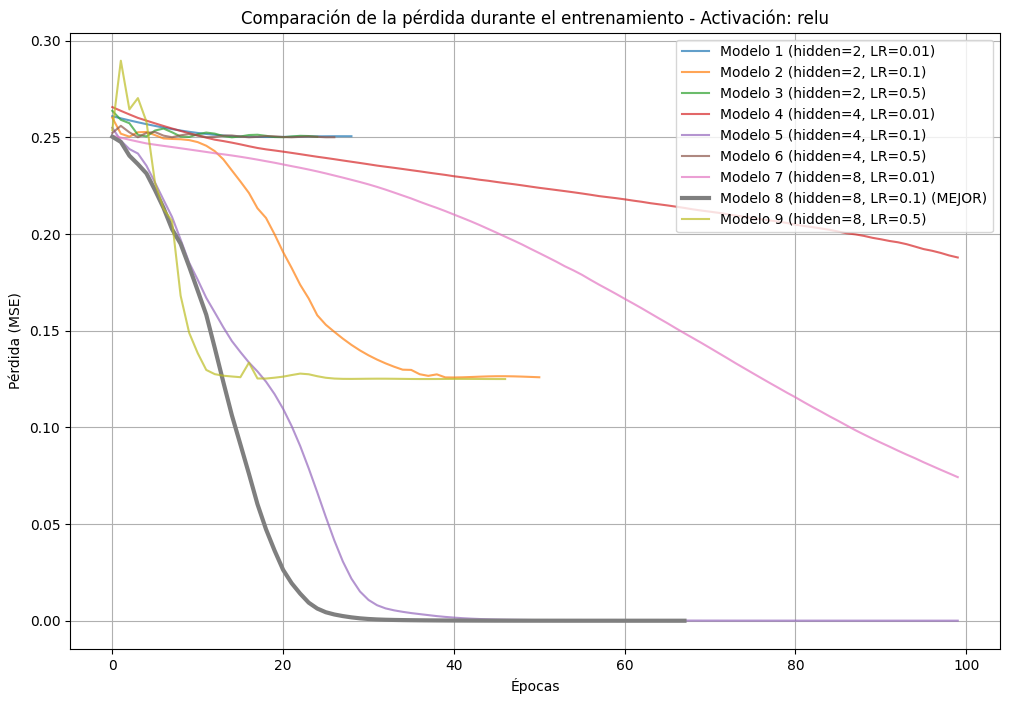

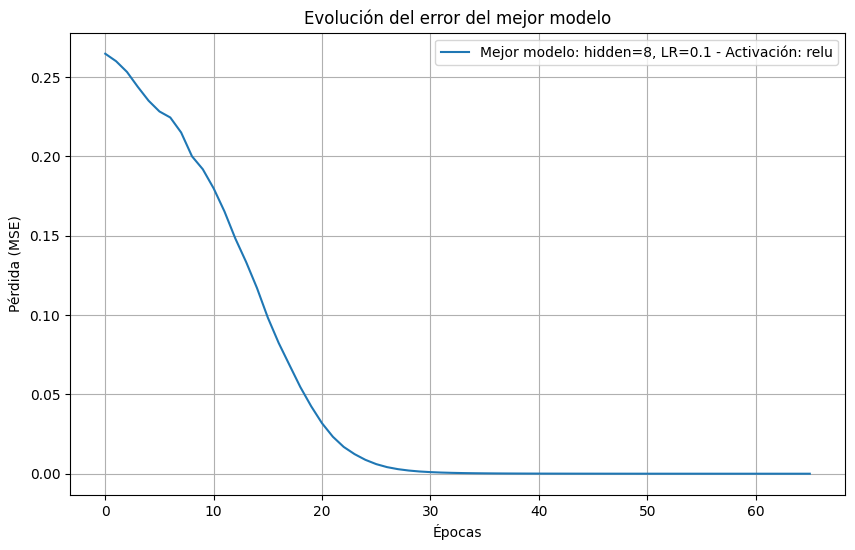


=== Tabla detallada del mejor modelo ===


,Neuronas capa oculta,Época,Salida,Error
0,"[[-0.51184344, 0.18598062], [0.37374836, 0.449...",0,[[0.46601576]\n [0.40229338]\n [0.4469725 ]\n ...,0.264662
1,"[[-0.51179713, 0.16867666], [0.35547817, 0.417...",1,[[0.54528636]\n [0.56261146]\n [0.586292 ]\n ...,0.259938
2,"[[-0.48194453, 0.18441765], [0.36839277, 0.416...",2,[[0.53827816]\n [0.56974614]\n [0.57370335]\n ...,0.253224
3,"[[-0.44321004, 0.21097057], [0.3955705, 0.4311...",3,[[0.5119926 ]\n [0.5400127 ]\n [0.54286176]\n ...,0.243816
4,"[[-0.411408, 0.22995794], [0.41718948, 0.43870...",4,[[0.48141044]\n [0.50400066]\n [0.5169345 ]\n ...,0.235039
...,...,...,...,...
61,"[[-1.6327167, -1.5544525], [1.7190347, 2.00664...",61,[[0.00414596]\n [0.9960866 ]\n [0.9937961 ]\n ...,0.000023
62,"[[-1.6361077, -1.5571166], [1.7206346, 2.00842...",62,[[0.00408849]\n [0.9961128 ]\n [0.99386734]\n ...,0.000022
63,"[[-1.6391841, -1.5595335], [1.7221262, 2.01004...",63,[[0.00403682]\n [0.99613696]\n [0.9939335 ]\n ...,0.000021
64,"[[-1.6419748, -1.5617259], [1.7235188, 2.01151...",64,[[0.0039903 ]\n [0.99615896]\n [0.9939949 ]\n ...,0.000021



=== Frontera de decisión del mejor modelo ===


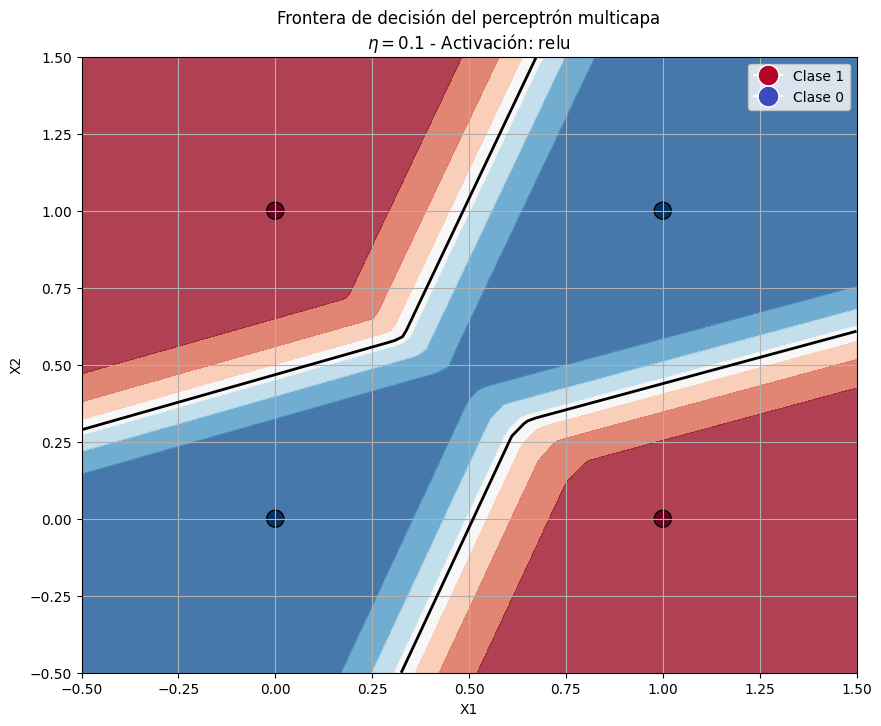


=== Modelo 1 con 2 neuronas, LR=0.01 ===
Parada temprana en época 21/100
Error final: 0.250179

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.489843  |
| 0.0  | 1.0  | 1.0    | 0.489169  |
| 1.0  | 0.0  | 1.0    | 0.488034  |
| 1.0  | 1.0  | 0.0    | 0.487465  |
------------------------------------

=== Modelo 2 con 2 neuronas, LR=0.1 ===

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.039994  |
| 0.0  | 1.0  | 1.0    | 0.663183  |
| 1.0  | 0.0  | 1.0    | 0.663488  |
| 1.0  | 1.0  | 0.0    | 0.665656  |
------------------------------------

=== Modelo 3 con 2 neuronas, LR=0.5 ===

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0

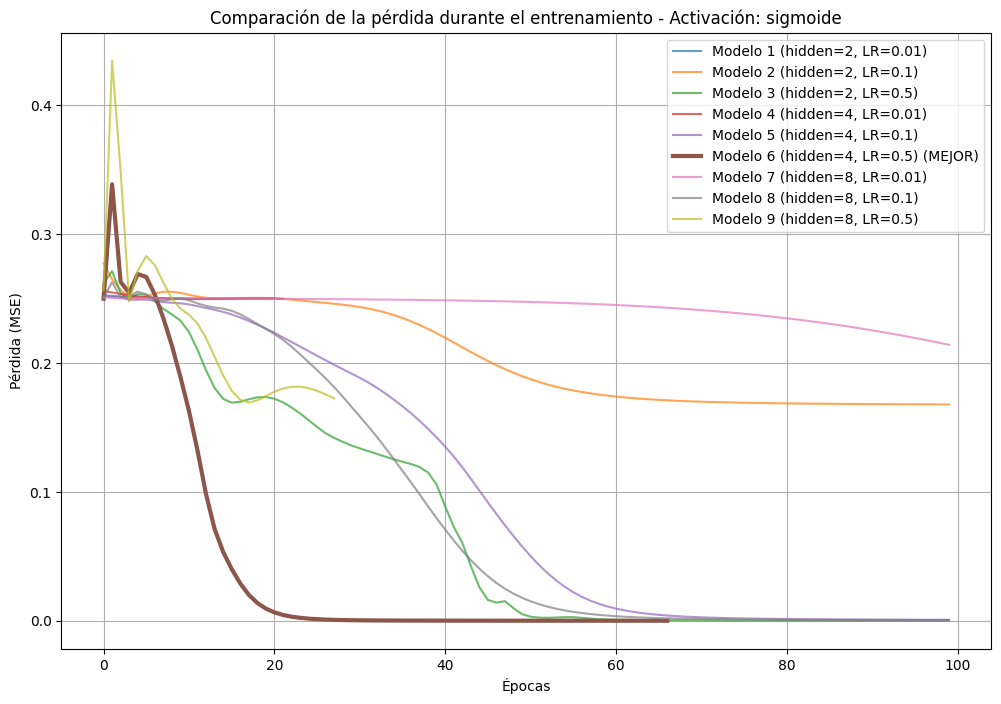

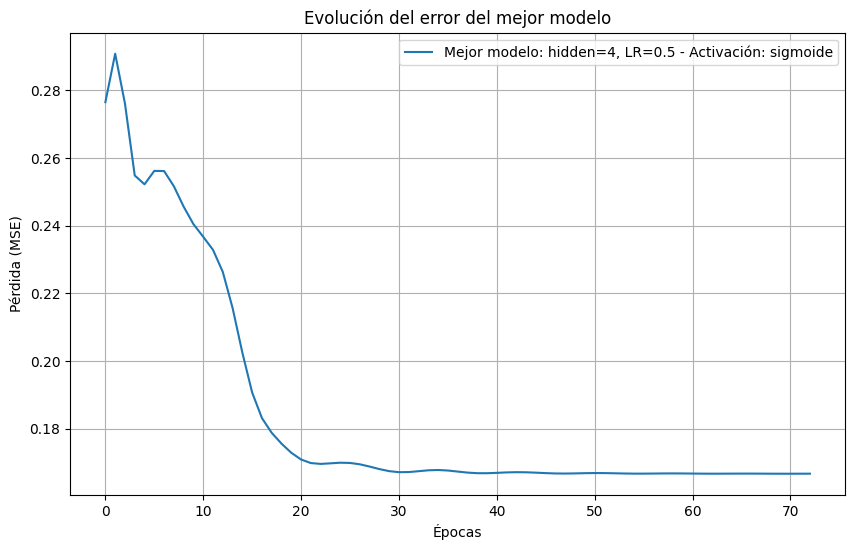


=== Tabla detallada del mejor modelo ===


,Neuronas capa oculta,Época,Salida,Error
0,"[[1.0315866, 1.1466069], [-0.23307478, -0.8907...",0,[[0.33210173]\n [0.3427511 ]\n [0.3312151 ]\n ...,0.276500
1,"[[0.9022305, 0.923627], [-0.61073565, -1.26150...",1,[[0.69462144]\n [0.7120123 ]\n [0.7067195 ]\n ...,0.290815
2,"[[0.57537854, 0.56659955], [-0.88940614, -1.55...",2,[[0.6581927 ]\n [0.65483505]\n [0.65350395]\n ...,0.276108
3,"[[0.22927573, 0.20366293], [-1.1084907, -1.796...",3,[[0.55461067]\n [0.544453 ]\n [0.54278874]\n ...,0.254844
4,"[[-0.0926941, -0.1252571], [-1.3433731, -2.016...",4,[[0.4600632 ]\n [0.45848638]\n [0.45574564]\n ...,0.252232
...,...,...,...,...
68,"[[-8.79188, -8.812699], [-14.374509, -14.09606...",68,[[0.00213158]\n [0.6633074 ]\n [0.66334957]\n ...,0.166723
69,"[[-8.810664, -8.831461], [-14.386665, -14.1084...",69,[[0.00216126]\n [0.6658472 ]\n [0.66588837]\n ...,0.166714
70,"[[-8.828863, -8.84964], [-14.3981, -14.119986]...",70,[[0.00219075]\n [0.6682842 ]\n [0.66832435]\n ...,0.166714
71,"[[-8.8465, -8.867258], [-14.408874, -14.130885...",71,[[0.00221567]\n [0.67019004]\n [0.6702293 ]\n ...,0.166721



=== Frontera de decisión del mejor modelo ===


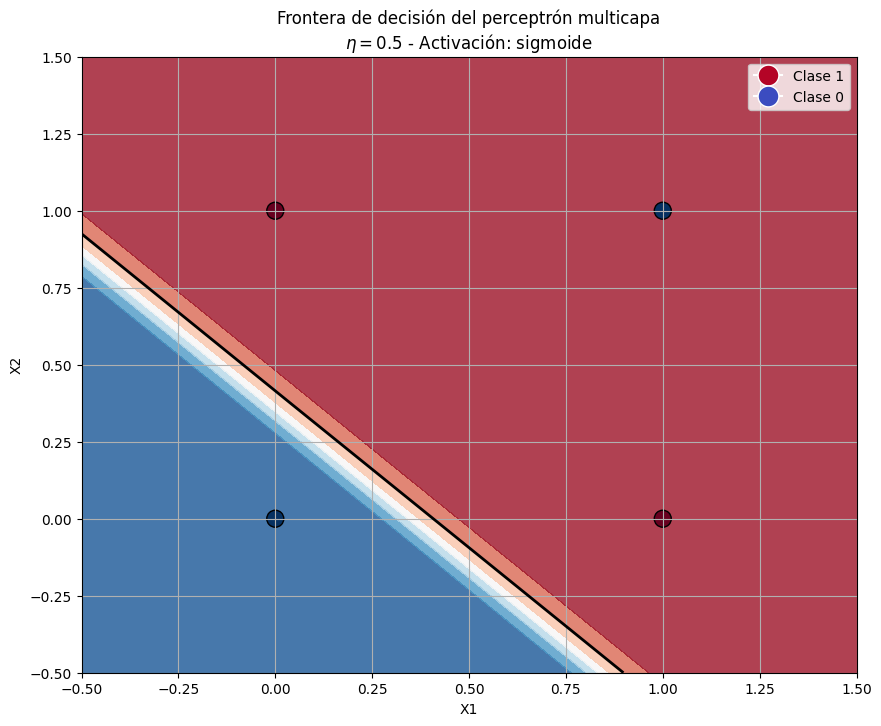

In [150]:
class PerceptronMLP(nn.Module):
    def __init__(self, tamano_entrada, tamano_oculta, tamano_salida, learning_rate=0.1, max_iteraciones=100, activacion='relu'):
        super(PerceptronMLP, self).__init__()
        self.capa_oculta = nn.Linear(tamano_entrada, tamano_oculta)
        self.capa_salida = nn.Linear(tamano_oculta, tamano_salida)
        self.sigmoide = nn.Sigmoid()

        self.activacion = activacion

        # Seleccionamos la función de activación para la capa oculta
        # hemos añadido la opción de 'sigmoide' para comparar con 'relu'
        if self.activacion == 'relu':
            self.func_activacion = nn.ReLU()
        elif self.activacion == 'sigmoide':
            self.func_activacion = nn.Sigmoid()
        else:
            raise ValueError("Función de activación no soportada. Usa 'relu' o 'sigmoide'")

        self.mse = nn.MSELoss()
        self.learning_rate = learning_rate
        self.max_iteraciones = max_iteraciones
        self.errores = []
        self.detalles_entrenamiento = []

    def forward(self, entrada)-> torch.Tensor:
        """Función que hace el Feed Forward de la red neuronal. Primero pasa las
        características por la capa oculta, luego aplica la función de activación
        ReLU y finalmente pasa por la capa de salida y la función de activación sigmoide.

        Args:
            entrada: Características de entrada para la red

        Returns:
            torch.Tensor: Salida de la red neuronal
        """

        salida = self.capa_oculta(entrada)
        salida = self.func_activacion(salida)
        salida = self.capa_salida(salida)
        salida = self.sigmoide(salida)
        return salida


    def entrenar(self, X, y) -> None:
        """Entrenar el perceptrón multicapa con un conjunto de
        datos de entrada X y sus respectivas salidas esperadas y.

        Args:
            X: Entradas de entrenamiento
            y: Salidas esperadas de entrenamiento
        """

        # Si no es un tensor, lo convertimos a tensor
        if not isinstance(X, torch.Tensor):
            X = torch.tensor(X, dtype=torch.float32)
        if not isinstance(y, torch.Tensor):
            y = torch.tensor(y, dtype=torch.float32)

        # Inicializamos el optimizador (Adam)
        optimizador = optim.Adam(self.parameters(), lr=self.learning_rate)

        # Inicializamos la lista de errores y detalles de entrenamiento
        self.errores = []
        self.detalles_entrenamiento = []

        mejor_error = float('inf')
        paciencia = 10
        contador_early_stopping = 0

        for epoca in range(self.max_iteraciones):

            # 1. Fast Forward
            salida = self.forward(X)
            error = self.mse(salida, y)
            error_valor = error.item()
            self.errores.append(error_valor)

            # 2. Backpropagation
            # Limpiamos los gradientes para no acumularlos
            optimizador.zero_grad()

            # Calculamos los gradientes
            error.backward()

            # Actualizamos los pesos
            optimizador.step()

            # 3. Guardamos los detalles de la iteración
            self.detalles_entrenamiento.append({
                'neuronas_ocultas': self.capa_oculta.weight.detach().numpy().copy(),
                'época': epoca,
                'salida': salida.detach().numpy().copy(),
                'error': error_valor
            })

            # Early stopping (solo si vemos que no mejora significativamente)
            if error_valor < mejor_error - 1e-5:
                # Hay una mejora significativa
                mejor_error = error_valor
                contador_early_stopping = 0
            else:
                contador_early_stopping += 1

            # Si hemos alcanzado nuestra paciencia, detenemos el entrenamiento
            if contador_early_stopping >= paciencia:
                print(f'Parada temprana en época {epoca+1}/{self.max_iteraciones}')
                print(f'Error final: {error_valor:.6f}')
                break

            # Opcional: Si el error es muy bajo, también paramos
            if error_valor < 1e-6:
                print(f'Error mínimo alcanzado en época {epoca+1}/{self.max_iteraciones}')
                break


    def mostrar_errores(self, lista_errores, etiquetas, titulo="Comparación de la pérdida durante el entrenamiento") -> None:
        """Muestra una gráfica con la evolución de los errores de varios modelos.

        Args:
            lista_errores: Lista de listas con los errores de cada modelo
            etiquetas: Lista de etiquetas para los modelos
            titulo (str, optional): Título de la gráfica. Por defecto es "Comparación de la pérdida durante el entrenamiento".
        """

        plt.figure(figsize=(10, 6))
        for error, etiqueta in zip(lista_errores, etiquetas):
            plt.plot(error, label=etiqueta)

        plt.xlabel('Épocas')
        plt.ylabel('Pérdida (MSE)')
        plt.title(titulo)
        plt.legend()
        plt.grid(True)
        plt.show()


    def probar_y_mostrar(self, X, y) -> None:
        """Probar el perceptrón con un conjunto de datos de entrada X y
        sus respectivas salidas esperadas y y mostrar los resultados.

        Args:
            X: Entradas de prueba
            y: Salidas esperadas de prueba
        """

        print("\nResultados del perceptrón multicapa:")
        print("------------------------------------")
        print("|  X1  |  X2  | Target | Predicho  |")
        print("------------------------------------")

        if not isinstance(X, torch.Tensor):
            X = torch.tensor(X, dtype=torch.float32)

        with torch.no_grad():
            for i in range(len(X)):
                entrada = X[i:i+1]
                prediccion = self(entrada).item()

                if isinstance(y, np.ndarray) and y[i].size == 1:
                    target = y[i].item()
                elif isinstance(y, list):
                    target = y[i]
                elif isinstance(y, torch.Tensor):
                    target = y[i].item() if y[i].numel() == 1 else y[i][0].item()
                else:
                    target = y[i]

                print(f"| {X[i][0].item():.1f}  | {X[i][1].item():.1f}  | {target:.1f}    | {prediccion:.6f}  |")

        print("------------------------------------")

    def mostrar_frontera_decision(self, X, y):
        """Muestra la frontera de decisión del perceptrón en un gráfico

        Args:
            X: Datos de entrada
            y: Salidas esperadas
        """

        # Creamos una malla para ver la frontera de decisión
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                            np.linspace(y_min, y_max, 100))

        # Convertimos a tensor de PyTorch
        grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

        # Calculamos la predicción para cada punto de la malla
        with torch.no_grad():
            Z = self(grid)
            Z = Z.reshape(xx.shape).numpy()

        # Pintamos la frontera de decisión
        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu_r)
        plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=2)

        # Pintamos los puntos del entrenamiento
        plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.RdBu_r, edgecolors='k', s=150)

        # Crear elementos de leyenda
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', markerfacecolor='#B40426', markersize=15, label='Clase 1'),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='#3B4CC0', markersize=15, label='Clase 0')
        ]

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title(f'Frontera de decisión del perceptrón multicapa\n$\\eta = {self.learning_rate}$ - Activación: {self.activacion}')
        plt.legend(handles=legend_elements, loc='best')
        plt.grid(True)
        plt.show()


    def generar_tabla_entrenamiento(self) -> pd.DataFrame:
        """Genera una tabla detallada del proceso de entrenamiento con una
        estructura única de columnas.

        Returns:
            pd.DataFrame: Tabla de entrenamiento
        """
        if not self.detalles_entrenamiento:
            return "No hay detalles de entrenamiento disponibles."

        # Creamos el DataFrame con los detalles de entrenamiento
        datos = []
        for detalle in self.detalles_entrenamiento:
            # Para cada registro de entrenamiento
            epoca = detalle['época']
            error = detalle['error']
            num_neuronas = detalle['neuronas_ocultas']

            # Formatear la salida para mostrarla de manera legible
            # Si la salida es muy grande, mostramos solo los primeros elementos
            salida = detalle['salida']
            if salida.size > 4:
                salida_str = str(salida[:2]) + "..." + str(salida[-2:])
            else:
                salida_str = str(salida)

            # Agregar fila a la tabla
            datos.append({
                "Neuronas capa oculta": num_neuronas,
                "Época": epoca,
                "Salida": salida_str,
                "Error": f"{error:.6f}"
            })

        # Creamos el DataFrame con los datos
        df = pd.DataFrame(datos)

        return df


def evaluar_diferentes_parametros(X, y, tipo_activacion):
    """Evaluar diferentes parámetros para el perceptrón y mostrar los resultados.

    Args:
        X: Datos de entrada
        y: Salidas esperadas
        tipo_activacion: Tipo de función de activación para la capa oculta ('relu' o 'sigmoide')
    Returns:
        list: Lista con los resultados de la evaluación
    """

    tamano_capa_entrada = 2
    tamano_capa_salida = 1

    # Rangos de valores para la capa oculta, epocas y learning_rates
    tamanos_capa_oculta = [2, 4, 8]
    learning_rates = [0.01, 0.1, 0.5]

    resultados = []
    errores = []
    etiquetas = []
    mejor_iteracion = float('inf')
    mejor_error = float('inf')
    mejor_tamano_capa_oculta = None
    mejor_learning_rate = None
    mejor_modelo_idx = -1

    modelo_idx = 0

    for tamano_capa_oculta in tamanos_capa_oculta:
        for learning_rate in learning_rates:
            modelo_idx += 1
            print(f"\n=== Modelo {modelo_idx} con {tamano_capa_oculta} neuronas, LR={learning_rate} ===")

            mlp = PerceptronMLP(tamano_capa_entrada, tamano_capa_oculta, tamano_capa_salida, learning_rate=learning_rate, activacion=tipo_activacion)
            mlp.entrenar(X, y)

            # Evaluamos los resultados
            error_final = mlp.errores[-1]
            umbral_convergencia = 0.01
            convergencia_alcanzada = error_final < umbral_convergencia

            # Probamos el perceptrón
            mlp.probar_y_mostrar(X, y)

            # Guardamos los errores y etiquetas para la visualización
            errores.append(mlp.errores)
            etiquetas.append(f'Modelo {modelo_idx} (hidden={tamano_capa_oculta}, LR={learning_rate})')

            resultados.append({
                'neuronas_capa_oculta': tamano_capa_oculta,
                'convergencia': convergencia_alcanzada,
                'error_final': error_final,
                'learning_rate': learning_rate
            })

            if error_final < mejor_error:
                mejor_funcion_activacion = tipo_activacion
                mejor_error = error_final
                mejor_learning_rate = learning_rate
                mejor_tamano_capa_oculta = tamano_capa_oculta
                mejor_iteracion = len(mlp.errores)
                mejor_modelo_idx = modelo_idx - 1  # Guardamos el índice del mejor modelo


    print("\n=== Mejores parámetros encontrados ===")
    print(f"Learning Rate: {mejor_learning_rate}, neuronas capa oculta: {mejor_tamano_capa_oculta}")
    print(f"Error final: {mejor_error:.6f}")
    print(f"Convergió en {mejor_iteracion} iteraciones")

    # Creamos el mejor perceptrón con los parámetros encontrados
    mejor_perceptron = PerceptronMLP(tamano_capa_entrada, mejor_tamano_capa_oculta, tamano_capa_salida,
                                     learning_rate=mejor_learning_rate, activacion=mejor_funcion_activacion)
    mejor_perceptron.entrenar(X, y)

    # Mostramos la gráfica con la evolución del error de todos los modelos
    print("\n=== Evolución del error durante el entrenamiento ===")

    # Primero mostrar todos los modelos
    plt.figure(figsize=(12, 8))
    for i, (error, etiqueta) in enumerate(zip(errores, etiquetas)):
        if i == mejor_modelo_idx:
            # Resaltamos el mejor modelo con línea más gruesa
            plt.plot(error, label=etiqueta + ' (MEJOR)', linewidth=3)
        else:
            plt.plot(error, label=etiqueta, alpha=0.7)

    plt.xlabel('Épocas')
    plt.ylabel('Pérdida (MSE)')
    plt.title(f'Comparación de la pérdida durante el entrenamiento - Activación: {mejor_funcion_activacion}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Ahora mostrar solo el mejor modelo para verlo más claro
    plt.figure(figsize=(10, 6))
    plt.plot(mejor_perceptron.errores, label=f'Mejor modelo: hidden={mejor_tamano_capa_oculta}, LR={mejor_learning_rate} - Activación: {mejor_funcion_activacion}')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida (MSE)')
    plt.title('Evolución del error del mejor modelo')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n=== Tabla detallada del mejor modelo ===")
    best_table = mejor_perceptron.generar_tabla_entrenamiento()
    display(best_table)


    # Mostramos la frontera de decisión de nuestro mejor modelo
    print("\n=== Frontera de decisión del mejor modelo ===")
    mejor_perceptron.mostrar_frontera_decision(X, y)

    return resultados

# Datos de entrenamiento para la función XOR
X_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_XOR = np.array([[0], [1], [1], [0]])

resultados_XOR_relu = evaluar_diferentes_parametros(X_XOR, y_XOR, 'relu')
resultados_XOR_sigmoide = evaluar_diferentes_parametros(X_XOR, y_XOR, 'sigmoide')